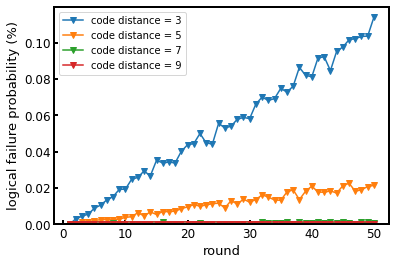

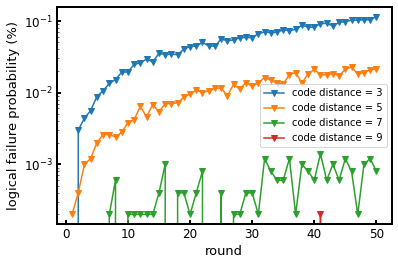

In [29]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os

################ 要変更 #################
# ファイル名
file = "ver2,p=0.001 ,eta=1000, d=(3,9,2), round=(1,50,1) , # of trials=500000" + ".csv"
########################################

# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/repetition_ver4"

# csvファイルの読み込み
os.chdir(path)
data = pd.read_csv(file, index_col=0)

# データフレームの行名(リスト)を取得
#ind = data.index

# データフレームの列名(リスト)を取得
code_distance_list = data.columns



##### グラフ作成 #####

plt.rcParams["xtick.direction"] = "in"     
plt.rcParams["ytick.direction"] = "in" 
fig, ax = plt.subplots()
round_list = np.arange(1,51,1)

for code_distance in code_distance_list:
    ax.plot(round_list, data[code_distance][1::2]*100,marker='v',label="code distance = "+str(code_distance))

ax.set_xticks(np.arange(0,51,10))
ax.set_xlabel("round", fontsize=13)
ax.set_ylabel("logical failure probability (%)", fontsize=13)
#ax.set_xlim(9,11)
ax.set_ylim(0,)
ax.spines["top"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.tick_params(direction="in", width=2, length=4, labelsize=12)
#ax.set_title("X,p=(0.0001,0.0009,0.0001),d=(3,9,2),d(rep)=5,eta=1000,trials=10000", fontsize=14)
plt.legend()
plt.show()

##### グラフ作成 #####

plt.rcParams["xtick.direction"] = "in"     
plt.rcParams["ytick.direction"] = "in" 
fig, ax = plt.subplots()
round_list = np.arange(1,51,1)

for code_distance in code_distance_list:
    ax.plot(round_list, data[code_distance][1::2]*100,marker='v',label="code distance = "+str(code_distance))

ax.set_xticks(np.arange(0,51,10))
ax.set_xlabel("round", fontsize=13)
ax.set_ylabel("logical failure probability (%)", fontsize=13)
#ax.set_xlim(9,11)
#ax.set_ylim(0,)
ax.spines["top"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.tick_params(direction="in", width=2, length=4, labelsize=12)
ax.set_yscale('log')
#ax.set_title("X,p=(0.0001,0.0009,0.0001),d=(3,9,2),d(rep)=5,eta=1000,trials=10000", fontsize=14)
plt.legend()
plt.show()

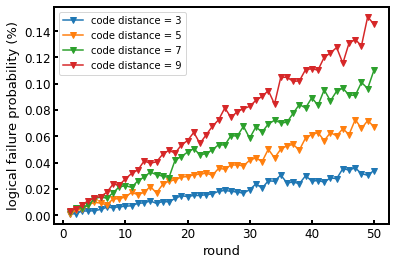

In [30]:
##### グラフ作成 #####

plt.rcParams["xtick.direction"] = "in"     
plt.rcParams["ytick.direction"] = "in" 
fig, ax = plt.subplots()
round_list = np.arange(1,51,1)

for code_distance in code_distance_list:
    ax.plot(round_list, data[code_distance][::2]*100,marker='v',label="code distance = "+str(code_distance))

ax.set_xticks(np.arange(0,51,10))
ax.set_xlabel("round", fontsize=13)
ax.set_ylabel("logical failure probability (%)", fontsize=13)
#ax.set_xlim(9,11)
#ax.set_ylim(12,17)
ax.spines["top"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.tick_params(direction="in", width=2, length=4, labelsize=12)
plt.legend()
plt.show()

## フィッティング

In [31]:
def logical_error_list(p,round_list):
    return 1/2 * (1-(1-2*p)**round_list)

def dif_loss_fun(data_list,logical_error_list,p,round_list):
    answer = 0
    data_list = np.array(data_list)
    for num in round_list:
        answer += num * (1-2*p)**(num-1) * (data_list[num-1] - logical_error_list[num-1])
    return answer

def fit(data_list,initial_p,round_list,trials,alpha):
    # trials：試行回数
    # alpha：学習率
    p = initial_p # pの初期値
    data_list = np.array(data_list)
    # ロス関数
    #for i in round_list:
        #loss_fun = 1/2 * np.sum((data_list - logical_error_list(p,np.arange(1,round_list,1)))**2)
    for trial in range(trials):
        # pの更新
        p = p + alpha * dif_loss_fun(data_list,logical_error_list(p,round_list),p,round_list)
        loss_fun = 1/2 * np.sum((data_list - logical_error_list(p,round_list))**2)
        #print(p, loss_fun)
    return p

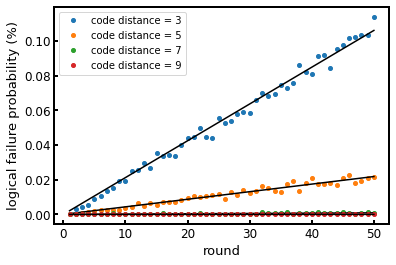

In [32]:
##### グラフ作成 #####

plt.rcParams["xtick.direction"] = "in"     
plt.rcParams["ytick.direction"] = "in" 
fig, ax = plt.subplots()
round_list = np.arange(1,51,1)

ss = 0
epsilon_list = []
for code_distance in code_distance_list:
    ax.plot(round_list, data[code_distance][1::2]*100,marker='o',markersize=4,linewidth=0,label="code distance = "+str(code_distance))
    # フィッティング
    initial_p = 0.0001
    round = 50
    trials = 5000
    alpha = 0.00002
    fin_p = fit(data[code_distance][1::2],initial_p,round_list,trials,alpha)
    ax.plot(round_list,logical_error_list(fin_p,round_list)*100,marker='', color="k")
    ss += 1
    epsilon_list.append(fin_p)

ax.set_xticks(np.arange(0,51,10))
ax.set_xlabel("round", fontsize=13)
ax.set_ylabel("logical failure probability (%)", fontsize=13)
#ax.set_xlim(9,11)
#ax.set_ylim(12,17)
ax.spines["top"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.tick_params(direction="in", width=2, length=4, labelsize=12)
#ax.set_title("X,p=(0.0001,0.0009,0.0001),d=(3,9,2),d(rep)=5,eta=1000,trials=10000", fontsize=14)
plt.legend()
plt.show()

In [33]:
print(epsilon_list)

[2.1245294960333892e-05, 4.3709344400865426e-06, 1.8283172288271532e-07, 1.910308797189472e-09]
